In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

chat_url = "https://raw.githubusercontent.com/Codecademy/datasets/master/twitch/chat.csv"
stream_url = "https://raw.githubusercontent.com/Codecademy/datasets/master/twitch/stream.csv"

chat = pd.read_csv(chat_url, header=None)
stream = pd.read_csv(stream_url)

In [4]:
chat.columns = ['time', 'device_id', 'login', 'channel', 'country', 'player', 'game']

print(stream.head())
print(chat.head())


                  time                                 device_id  \
0  2015-01-01 18:33:52  40ffc2fa6534cf760becbdbf5311e31ad069e46e   
1  2015-01-01 23:35:33  9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760   
2  2015-01-01 04:39:38  2f9c3f9ee1033b71a3819564243f20ef3bec0183   
3  2015-01-01 11:15:30  0cda8226ba2583424c80c3c1c22c1256b080ad17   
4  2015-01-01 11:28:19  e3288ca5e3153aa85e32f64cdd994b7666968dcf   

                                      login  channel country    player  \
0  085c1eb7b587bfe654f0df7b4ba7f4fc4013636c    frank      US  iphone_t   
1  5ad49a7b408ce452140b180dd6efb57a9f4d22c7   george      US      site   
2  5b9a43e68f019185f55615d0b83019dee4b5d06f    frank      US      site   
3  02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b  estelle      CH      site   
4  b920c228acbcbebee26d9c79f6eb73b73a9480c7    morty      FR      site   

                  game stream_format subscriber  
0    League of Legends           NaN        NaN  
1                 DayZ       chunked      Fals

All unique games in stream / chat

In [5]:
chat_games = chat.game.unique()
stream_games = stream.game.unique()

print(chat_games)
print()
print(stream_games)

['Dota 2' 'Devil May Cry 4: Special Edition' 'League of Legends'
 'Gaming Talk Shows' 'DayZ' 'The Binding of Isaac: Rebirth'
 'World of Tanks' 'Counter-Strike: Global Offensive' 'Heroes of the Storm'
 'Agar.io' 'Hearthstone: Heroes of Warcraft' 'ARK: Survival Evolved'
 'Rocket League' nan 'Duck Game' 'SpeedRunners' 'Fallout 3'
 'Grand Theft Auto V' 'Breaking Point' 'Batman: Arkham Knight' 'Depth']

['League of Legends' 'DayZ' 'Dota 2' 'Heroes of the Storm'
 'Counter-Strike: Global Offensive' 'Hearthstone: Heroes of Warcraft'
 'The Binding of Isaac: Rebirth' 'Agar.io' 'Gaming Talk Shows' nan
 'Rocket League' 'World of Tanks' 'ARK: Survival Evolved' 'SpeedRunners'
 'Breaking Point' 'Duck Game' 'Devil May Cry 4: Special Edition'
 'Block N Load' 'Fallout 3' 'Batman: Arkham Knight' 'Reign Of Kings'
 'The Witcher 3: Wild Hunt' 'The Elder Scrolls V: Skyrim'
 'Super Mario Bros.' 'H1Z1' 'The Last of Us' 'Depth' 'Mortal Kombat X'
 'Senran Kagura: Estival Versus' 'The Sims 4' 'You Must Build A Bo

Find most popular games in stream 

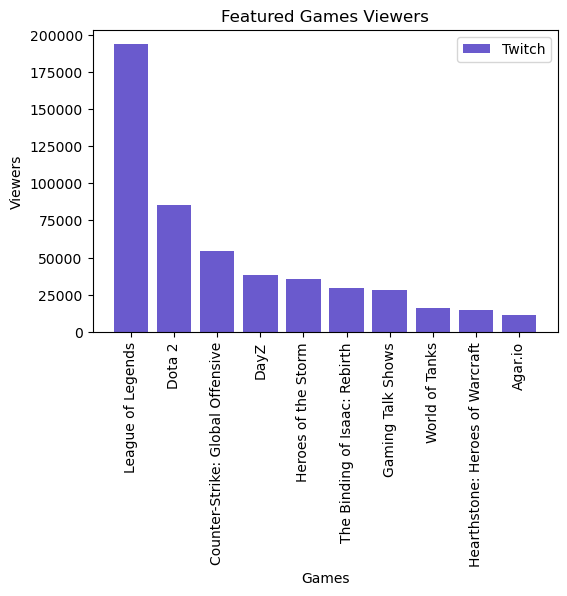

In [6]:
import matplotlib as mpl  # Charts were fuzzy in output in vscode
mpl.rcParams['figure.dpi']= 100

popular_stream_games = stream.groupby(['game']).device_id.count()
popular_stream_games = popular_stream_games.sort_values(ascending=False)
#print(popular_stream_games)
games = list(popular_stream_games.index)[:10]
viewers = list(popular_stream_games.values)[:10]
plt.bar(range(len(games)), viewers, color='Slateblue')
plt.title('Featured Games Viewers')
plt.xlabel('Games')
plt.ylabel('Viewers')
plt.legend(['Twitch'])
ax = plt.subplot()
ax.set_xticks(range(len(games)))
ax.set_xticklabels(games, rotation=90)
plt.show()

I know it's not ideal to twist and turn your head to read the labels but I am not sure how else to make all the labels legible.

Create a list of League of Legend viewers by country.

<Figure size 600x400 with 0 Axes>

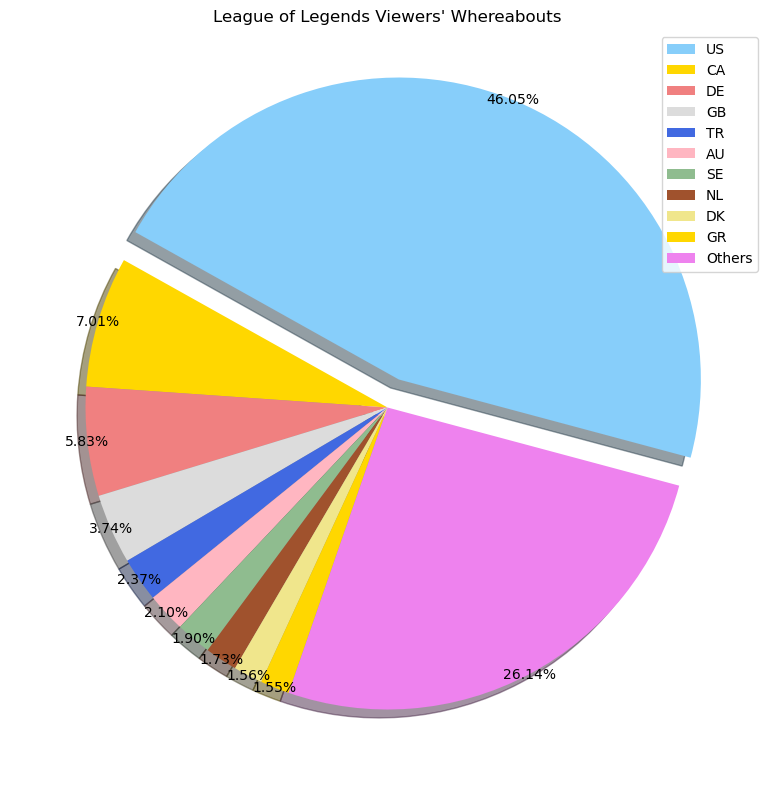

In [7]:
lol_viewers = stream[stream.game=='League of Legends'].groupby(['country']).device_id.count().sort_values(ascending=False)
lol_viewers = lol_viewers.rename(lambda x: 'Other' if lol_viewers.loc[x] < 2800 else x)
labels = lol_viewers.index.unique()
others_sum = lol_viewers[lol_viewers.index == 'Other'].sum()
lol_viewers = lol_viewers.drop(labels='Other')
other_ser = pd.Series({'Others': others_sum})
lol_viewers = lol_viewers.append(other_ser)
#print(lol_viewers.value_counts())

plt.clf()
#category names and black, change to white, add explode and shadows and other
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
plt.figure(figsize=(10, 10))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(list(lol_viewers.value_counts().index), explode=explode,  labeldistance=0.7, colors = colors, autopct='%.2f%%', shadow=True, startangle=345, pctdistance=1 )
plt.legend(labels=list(lol_viewers.index))
plt.title('League of Legends Viewers\' Whereabouts')
plt.show()

How many viewers are watching streams on each device?

In [8]:
device_viewers = stream.groupby(['player']).device_id.count().sort_values(ascending=False)
print(device_viewers)

player
site             246115
iphone_t         100689
android           93500
ipad_t            53646
embed             19819
xbox_one           4863
home               3479
frontpage          1567
amazon             1155
xbox360             965
roku                233
chromecast          149
facebook             83
nvidia shield         3
ouya                  3
android_pip           2
Name: device_id, dtype: int64


Create new "Genre" column.

In [9]:
def game_genre(game):
    if game == ('League of Legends' or ('Dota 2' or 'Heroes of the Storm')):
        return 'MOBA'
    elif game == ('Counter-Strike: Global Offensive'):
        return 'FPS'
    elif game == ('DayZ' or 'ARK: Survival Evolved'):
        return 'Survival'
    else:
        return 'Other'
stream['genre'] = stream.game.apply(game_genre)
genres_grouped = stream.groupby(['genre']).device_id.count().sort_values(ascending=False)
print(genres_grouped)

genre
Other       240313
MOBA        193524
FPS          54437
Survival     37997
Name: device_id, dtype: int64


## How does view count change throughout the day?


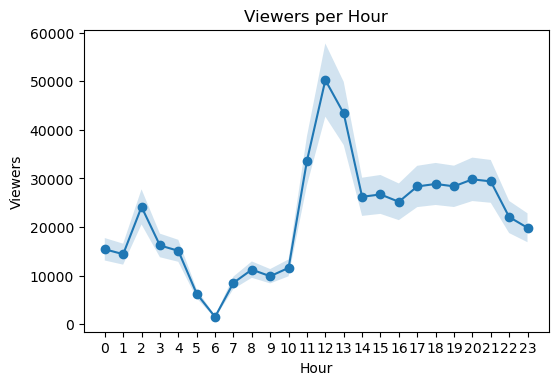

In [10]:
from datetime import datetime
#stream.info()
stream.time = pd.to_datetime(stream.time)
stream_hour = stream.time.apply(lambda x: x.strftime('%H'))
stream_hour_grouped_sorted = stream_hour.value_counts().sort_values(ascending=False)
stream_hour_grouped = stream_hour.value_counts().sort_index()
#print(stream_hour_grouped)

hour = range(24)
viewers = list(stream_hour_grouped)
plt.clf()
plt.plot(hour, viewers, marker='o')
plt.title('Viewers per Hour')
plt.xlabel('Hour')
plt.ylabel('Viewers')
ax = plt.subplot()
ax.set_xticks(hour)
y_upper = [i * 1.15 for i in viewers]
y_lower = [i * 0.85 for i in viewers]
plt.fill_between(hour, y_upper, y_lower, alpha=0.2)
plt.show()


We can clearly see that streaming around noon is the most popular time of day, followed by streaming in the evening, with morning streams (before 8AM) being the least popular.

What if instead, we would like to see how views change throughout the day depending on what type of device is being use to stream? Perhaps more people are using mobile devices throughout the day when they are at school, work, etc.

In [11]:
stream_player = pd.DataFrame(data={'hour':stream_hour, 'device':stream.player})
players = stream.player.unique()

<Figure size 600x400 with 0 Axes>

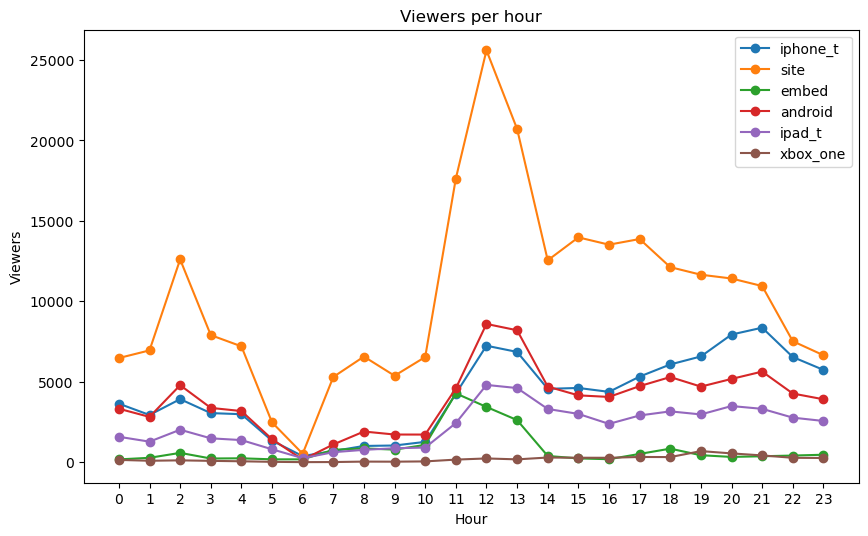

In [23]:
# start off plotting one device, then will figure out
# print(stream_player)

# iphone = stream_player[stream_player.device == 'iphone_t'].value_counts().sort_index(ascending=True)
# plt.clf()
# print(hour)
# print(iphone.values)
# plt.plot(hour, iphone.values, marker='o')
# plt.title('iphone' + ' viewers per hour')
# plt.xlabel('hour')
# plt.ylabel('viewers')
# plt.show()
plt.clf()
plt.figure(figsize=(10,6))
player_names = []
for player in players:  
    try:  # Not all players are used for each hour in the day
        playr = stream_player[stream_player.device == player].value_counts().sort_index(ascending=True)
        # print(hour)
        # print(playr.values)
        plt.plot(hour, playr.values, marker='o')
        player_names.append(player)
    except:
        continue
plt.title('Viewers per hour')
plt.legend(player_names)
plt.xlabel('Hour')
plt.xticks(range(24))
plt.ylabel('Viewers')
plt.show()


Evidently the site is the largest medium to watch streams on by a very large margin. All of the players follow roughly the same viewing pattern, with the largest level of viewing activity taking place around noon, followed with rather steady views into the evening and a drop off into the early morning. I do think it is worth mention that the iphone_t player reaches a peak at around 9pm, and becomes nearly the most popular player to watch streams on from hour 21 to 23.